# Second Order Correction

## Neumann Boundary Conditions

In [1]:
import numpy as np

from MTI_Differential_Equation import GMTI_NeumannBC
from SC_Gorkov_Equation import GSC_matrix, FSC_matrix


# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)


# Function evaluating the G2-MTI using the G0 with Neumann BC
def GMTI2_NeumannBC(d, z, Z, z0, kx, ky, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # GMTI(z,z0)
    GMTIz = GMTI_NeumannBC(d=d, z=z, Z=z0, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_NeumannBC(d=d, z=z0, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GSC(0)
    GSC = GSC_matrix(z=0., kx=0., ky=0., mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (GMTIz @ Gamma @ GSC @ Gamma.H @ GMTIZ).A


# Function evaluating the F2-MTI using the G0 with Neumann BC
def FMTI2_NeumannBC(d, z, Z, z0, kx, ky, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # GMTI(z0,z)
    GMTIz = GMTI_NeumannBC(d=d, z=z0, Z=z, kx=kx, ky=ky, L=L, w=-omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_NeumannBC(d=d, z=z0, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # FSC(0)
    FSC = FSC_matrix(z=0., kx=0., ky=0., mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (np.transpose(GMTIz) @ np.conj(Gamma) @ FSC @ Gamma.H @ GMTIZ).A

## **Normal Green's Function**
We plot here the Green's function $\mathcal{G}^{(2)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'=z$.

In [2]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# compute unperturbed Green's function
G0 = np.array([GMTI_NeumannBC(d=d, z=z, Z=z, kx=0., ky=0., L=L, w=omega) for z in lattice])
# compute second order correction (Neumann BC)
G2 = np.array([GMTI2_NeumannBC(d=d, z=z, Z=z, z0=z0, kx=0., ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])

#### <font color='green'> **Real Part** </font> 

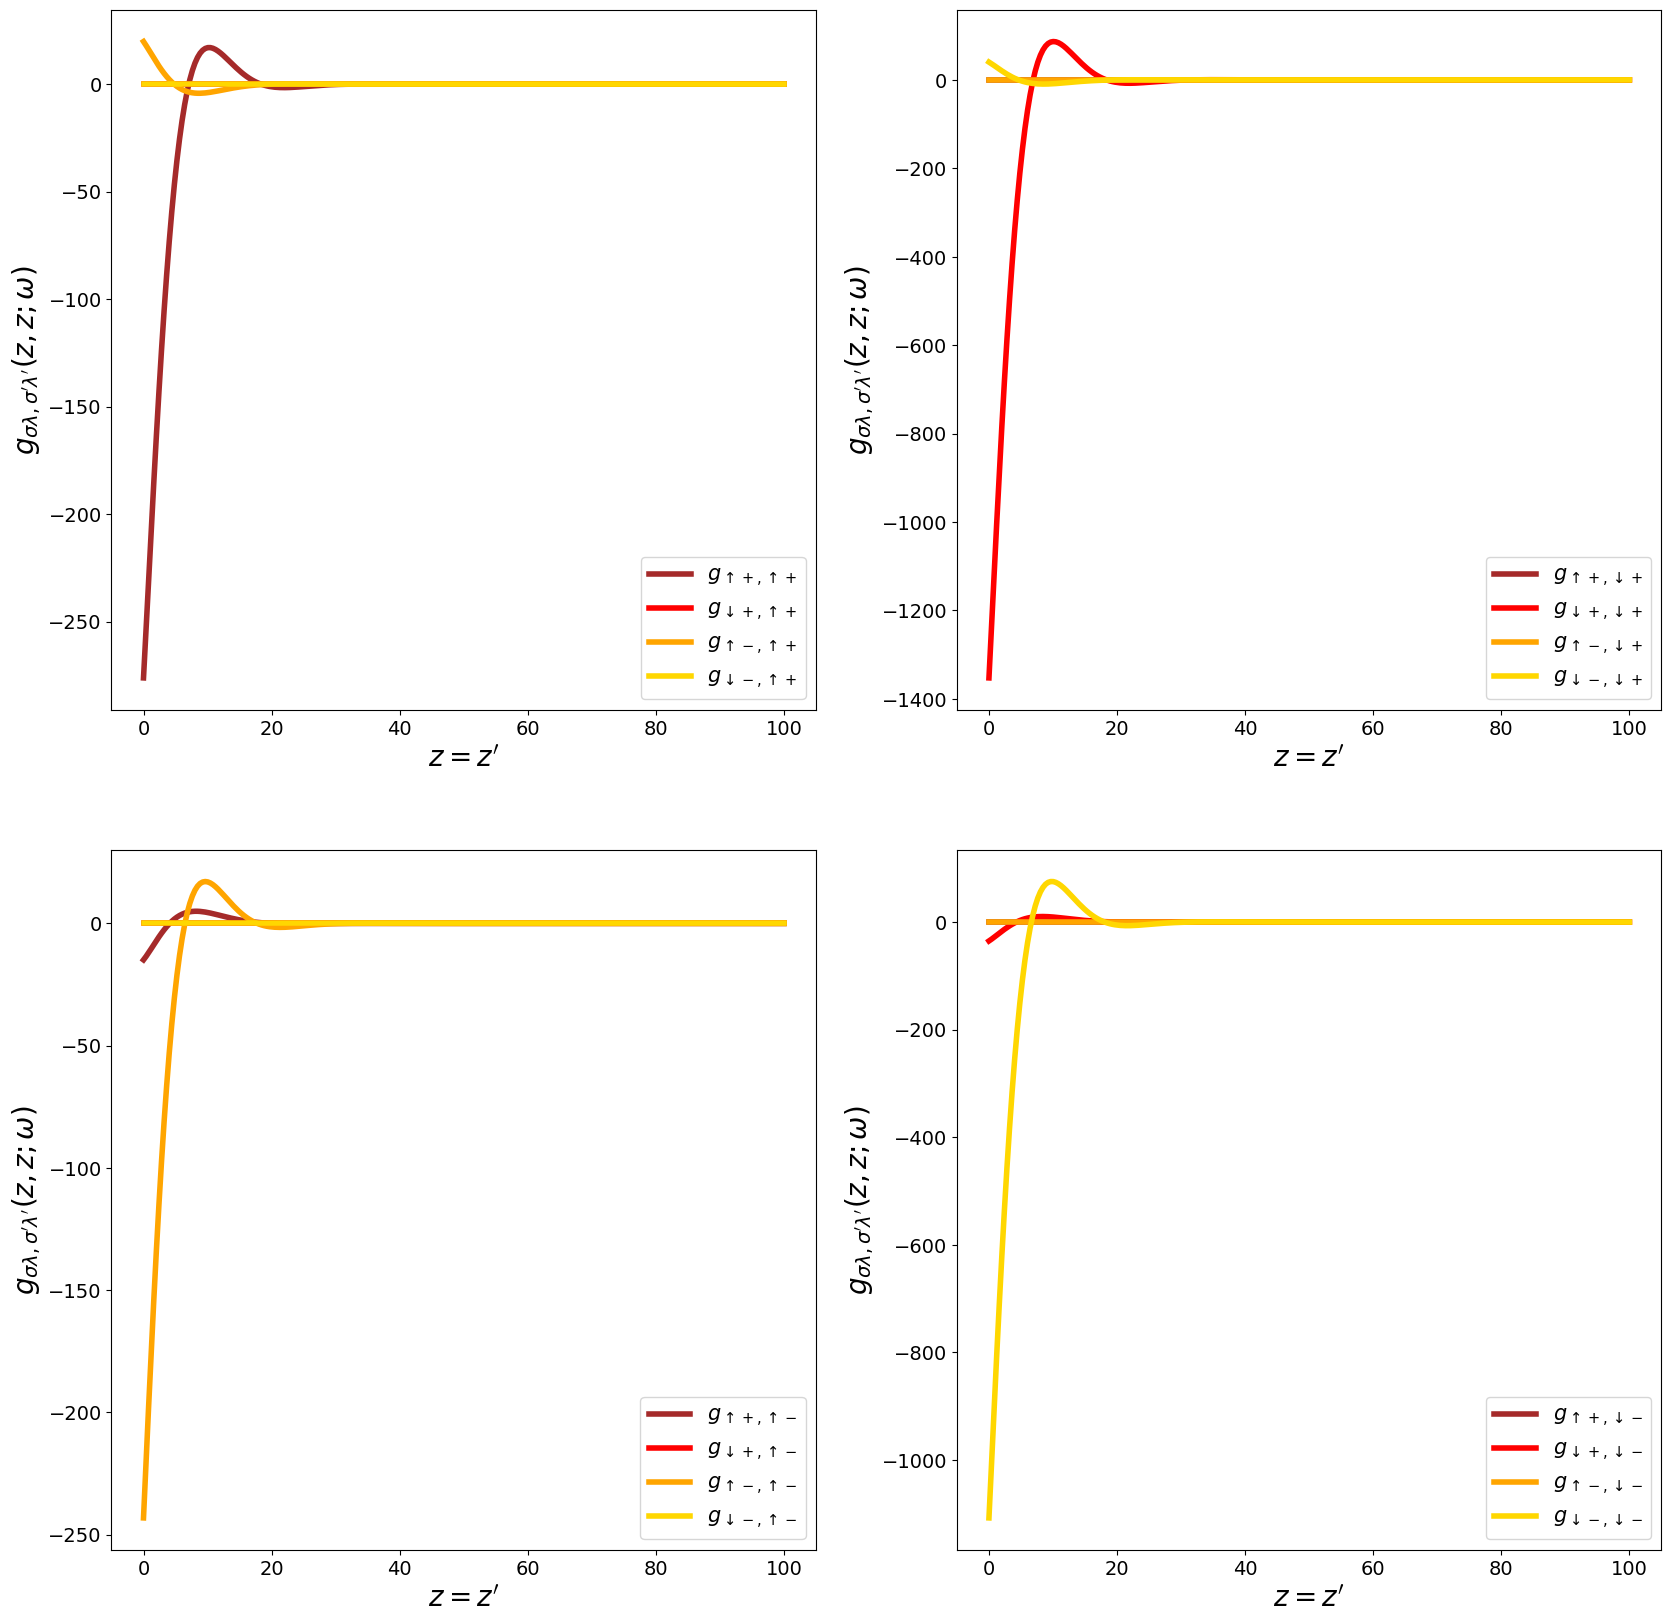

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

gamma = 1.

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# G up to second order
G = G0 + gamma**2*G2
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction G2
        axs[iPic][jPic].plot(lattice, [gamma**2*G2[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )
        # plot G0 + G2
        #axs[iPic][jPic].plot(lattice, [G[idx][irow][icol].real for idx in range(len(lattice))], c='black', lw=4, ls=':')

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

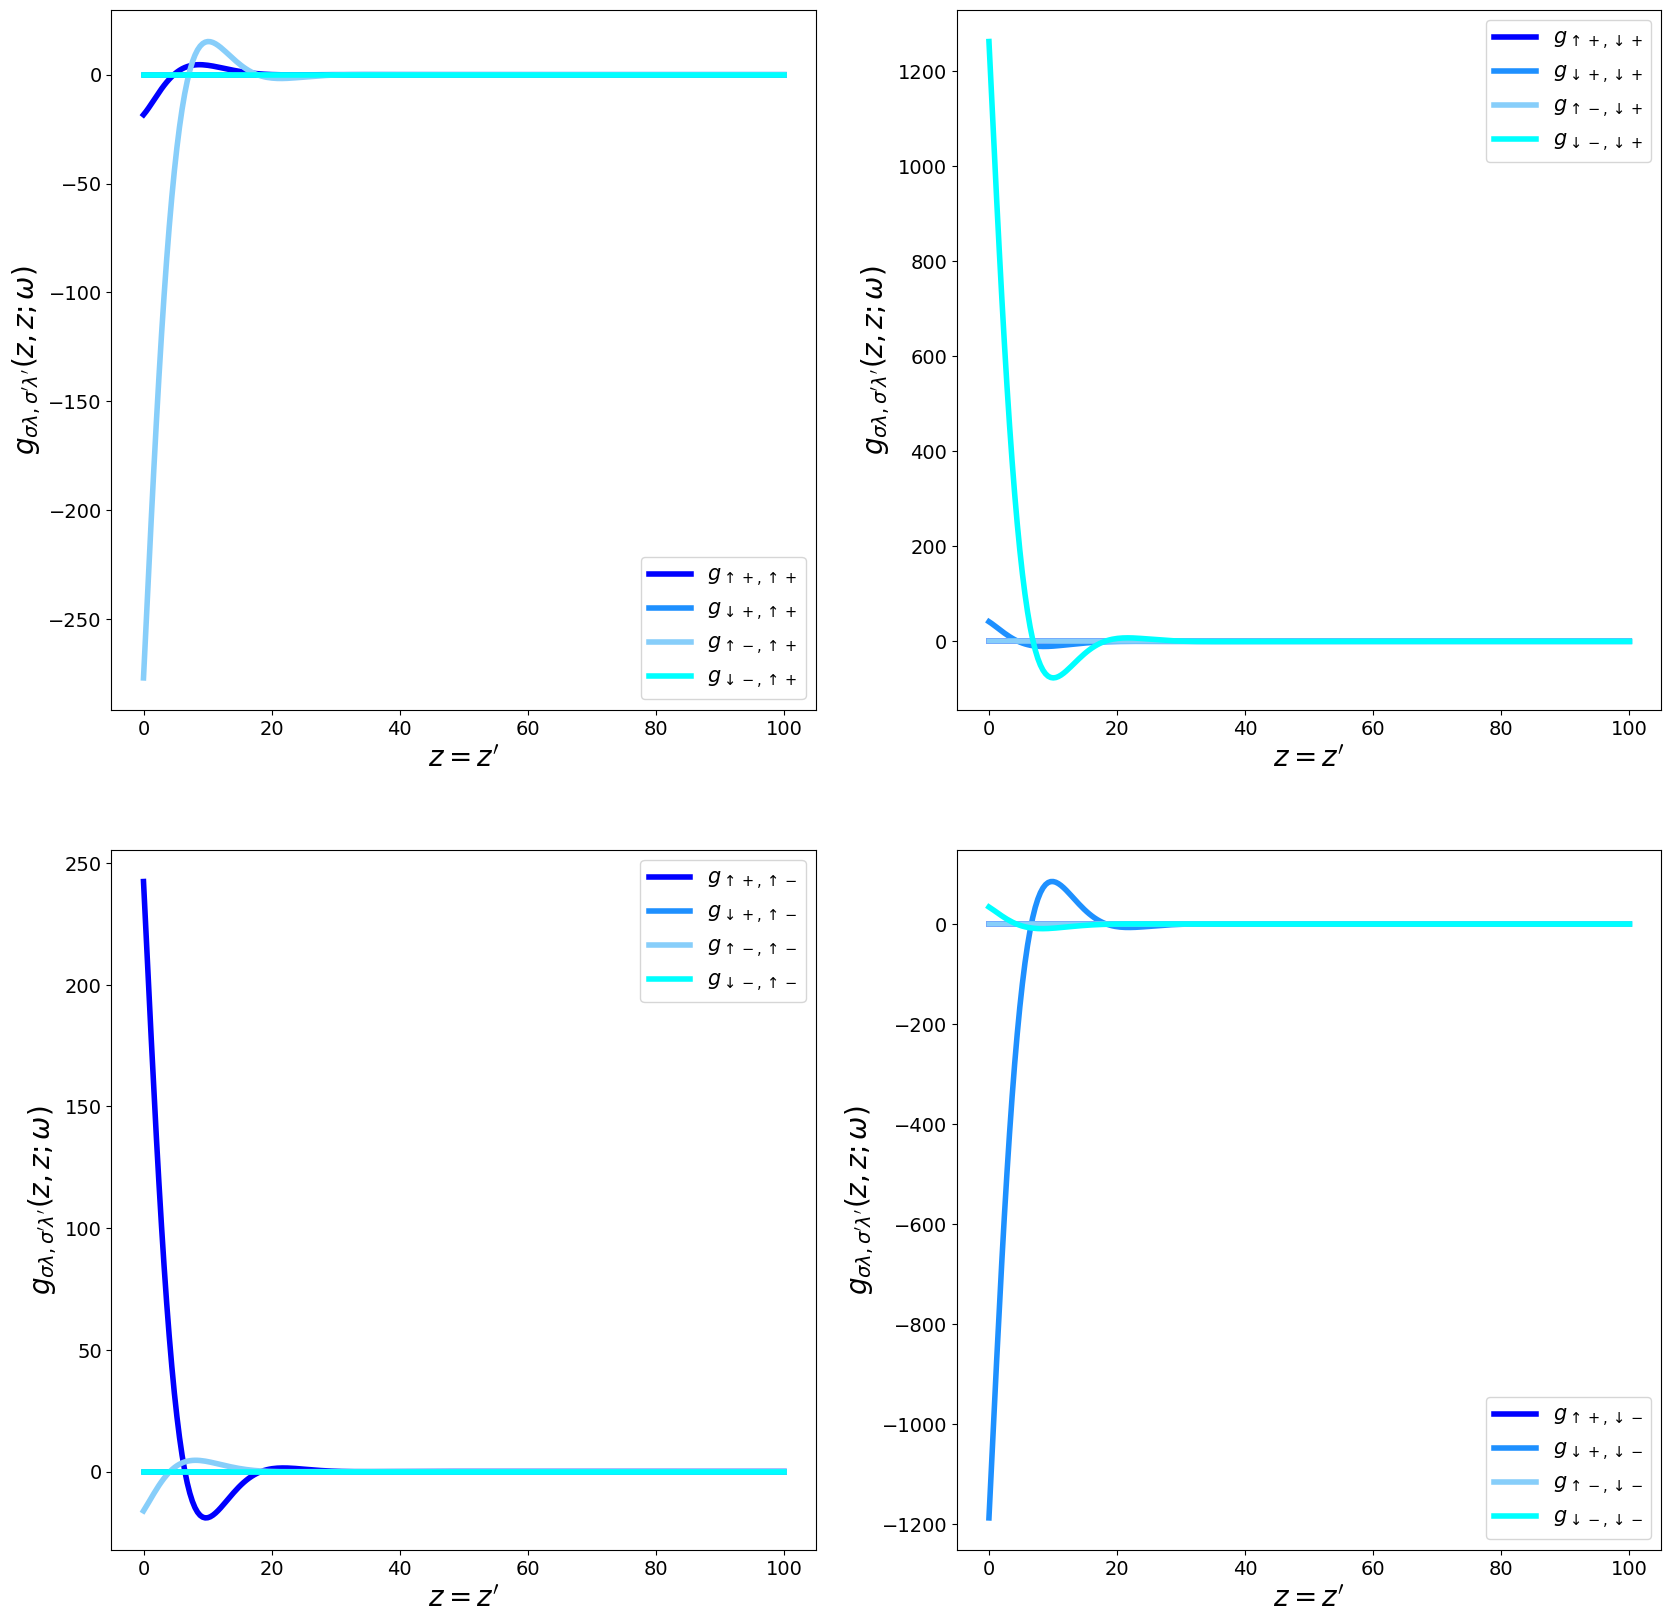

In [4]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction G2
        axs[iPic][jPic].plot(lattice, [gamma**2*G2[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )
        # plot G0 + G2
        #axs[iPic][jPic].plot(lattice, [G[idx][irow][icol].imag for idx in range(len(lattice))], c='black', lw=4, ls=':')

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

We plot here the Green's function $\mathcal{G}^{(2)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z$ and with fixed $z'$.

In [5]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025; z0=0; zp = 100.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# compute unperturbed Green's function
G0 = np.array([GMTI_NeumannBC(d=d, z=z, Z=zp, kx=0., ky=0., L=L, w=omega) for z in lattice])
# compute second order correction (Neumann BC)
G2 = np.array([GMTI2_NeumannBC(d=d, z=z, Z=zp, z0=z0, kx=0., ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])

#### <font color='green'> **Real Part** </font> 

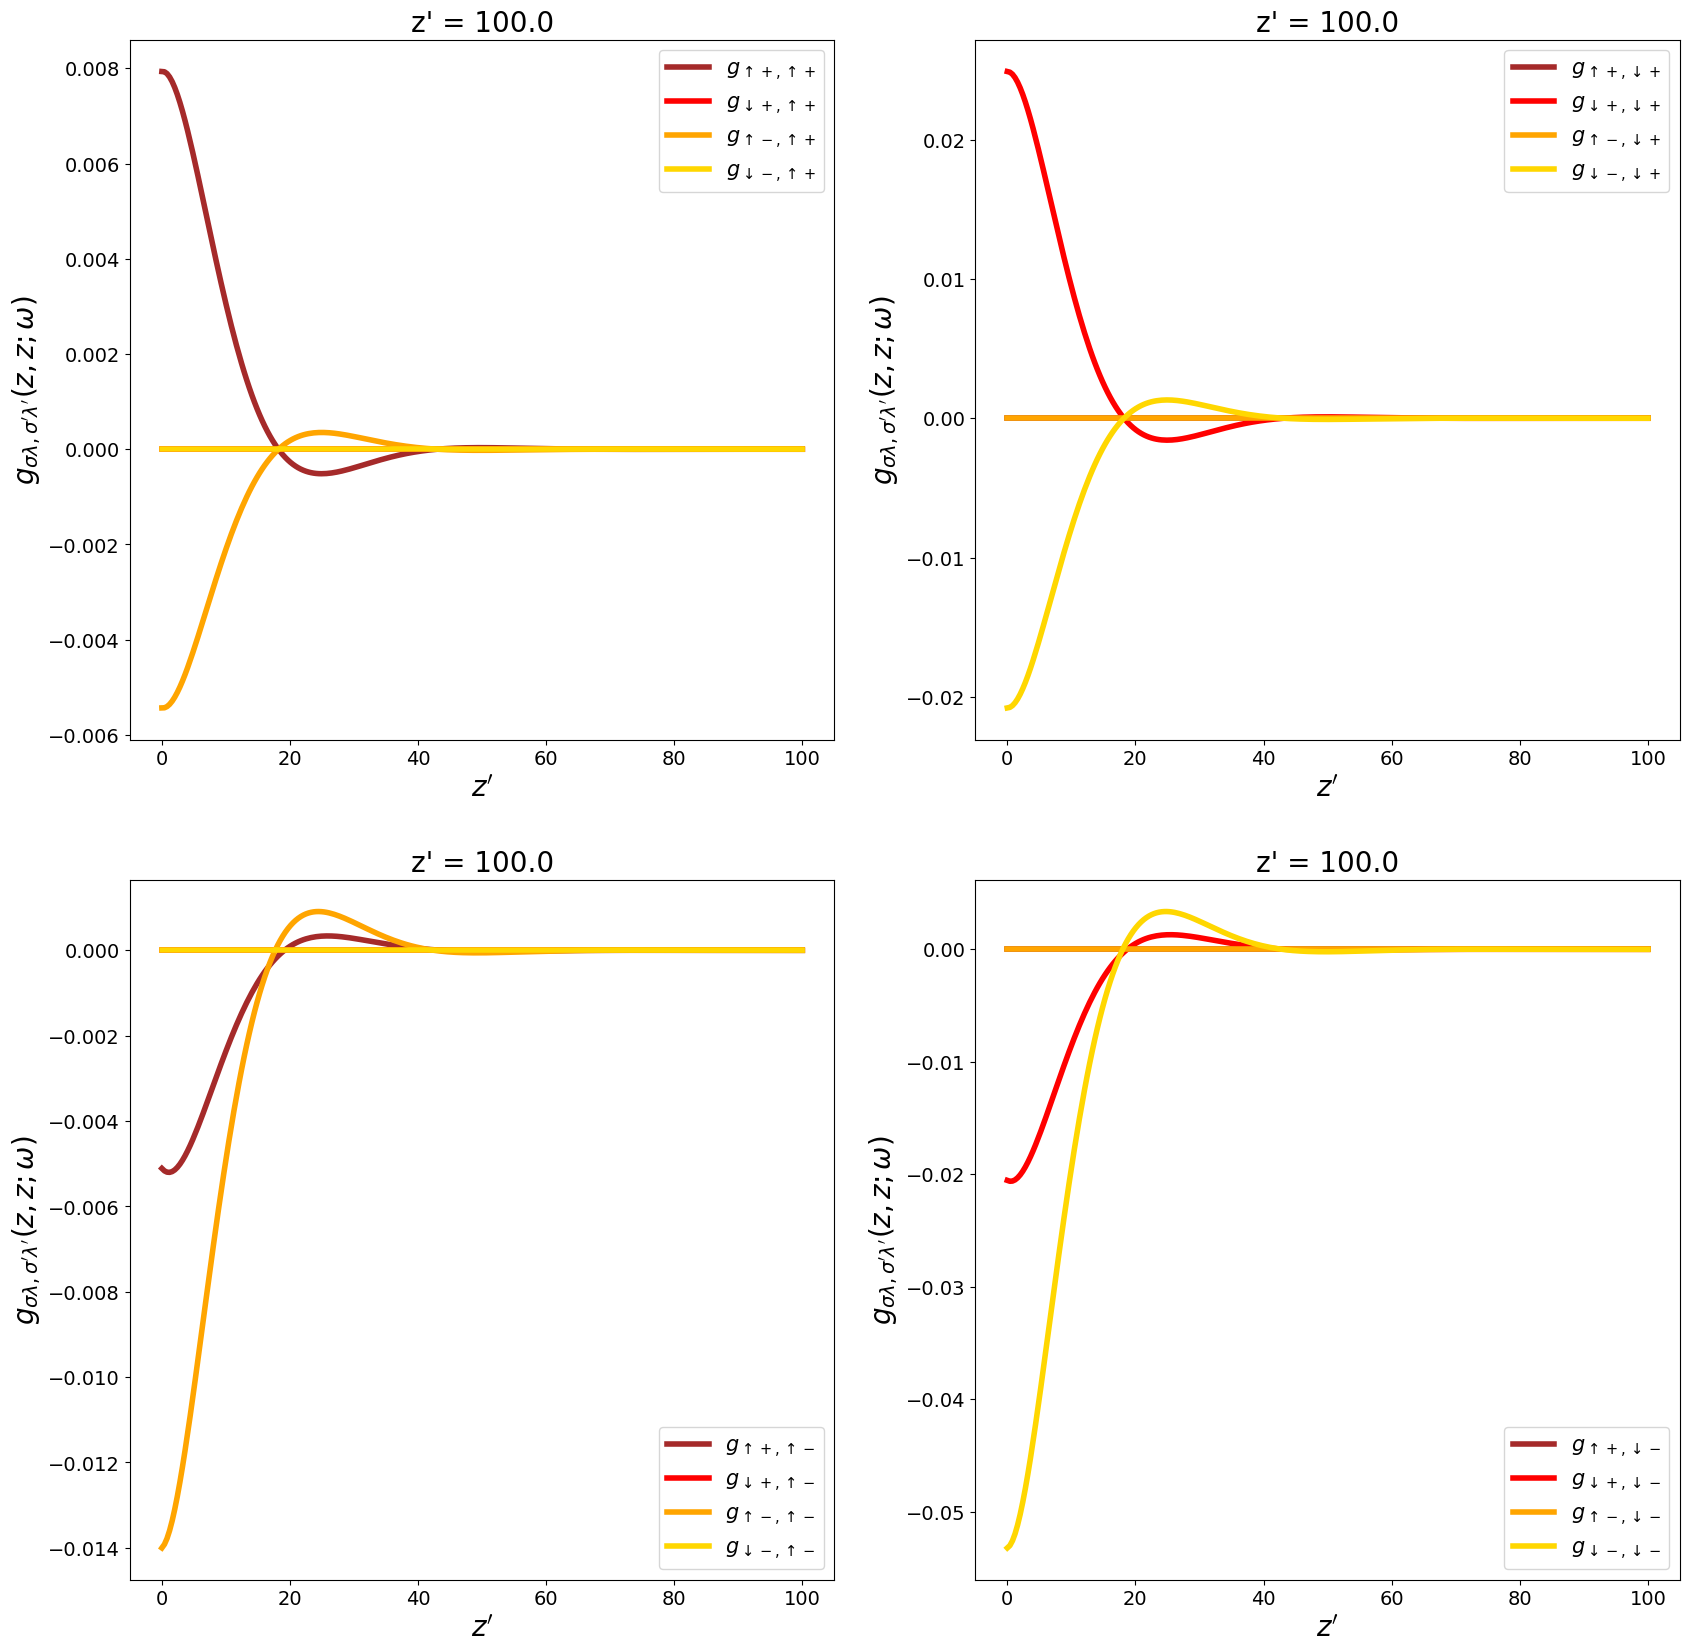

In [6]:
gamma = 1.
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']

# G up to second order
G = G0 + gamma**2*G2
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction G2
        axs[iPic][jPic].plot(lattice, [gamma**2*G2[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    axs[iPic][jPic].set_title("z' = " + str(zp), fontsize = 20)
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

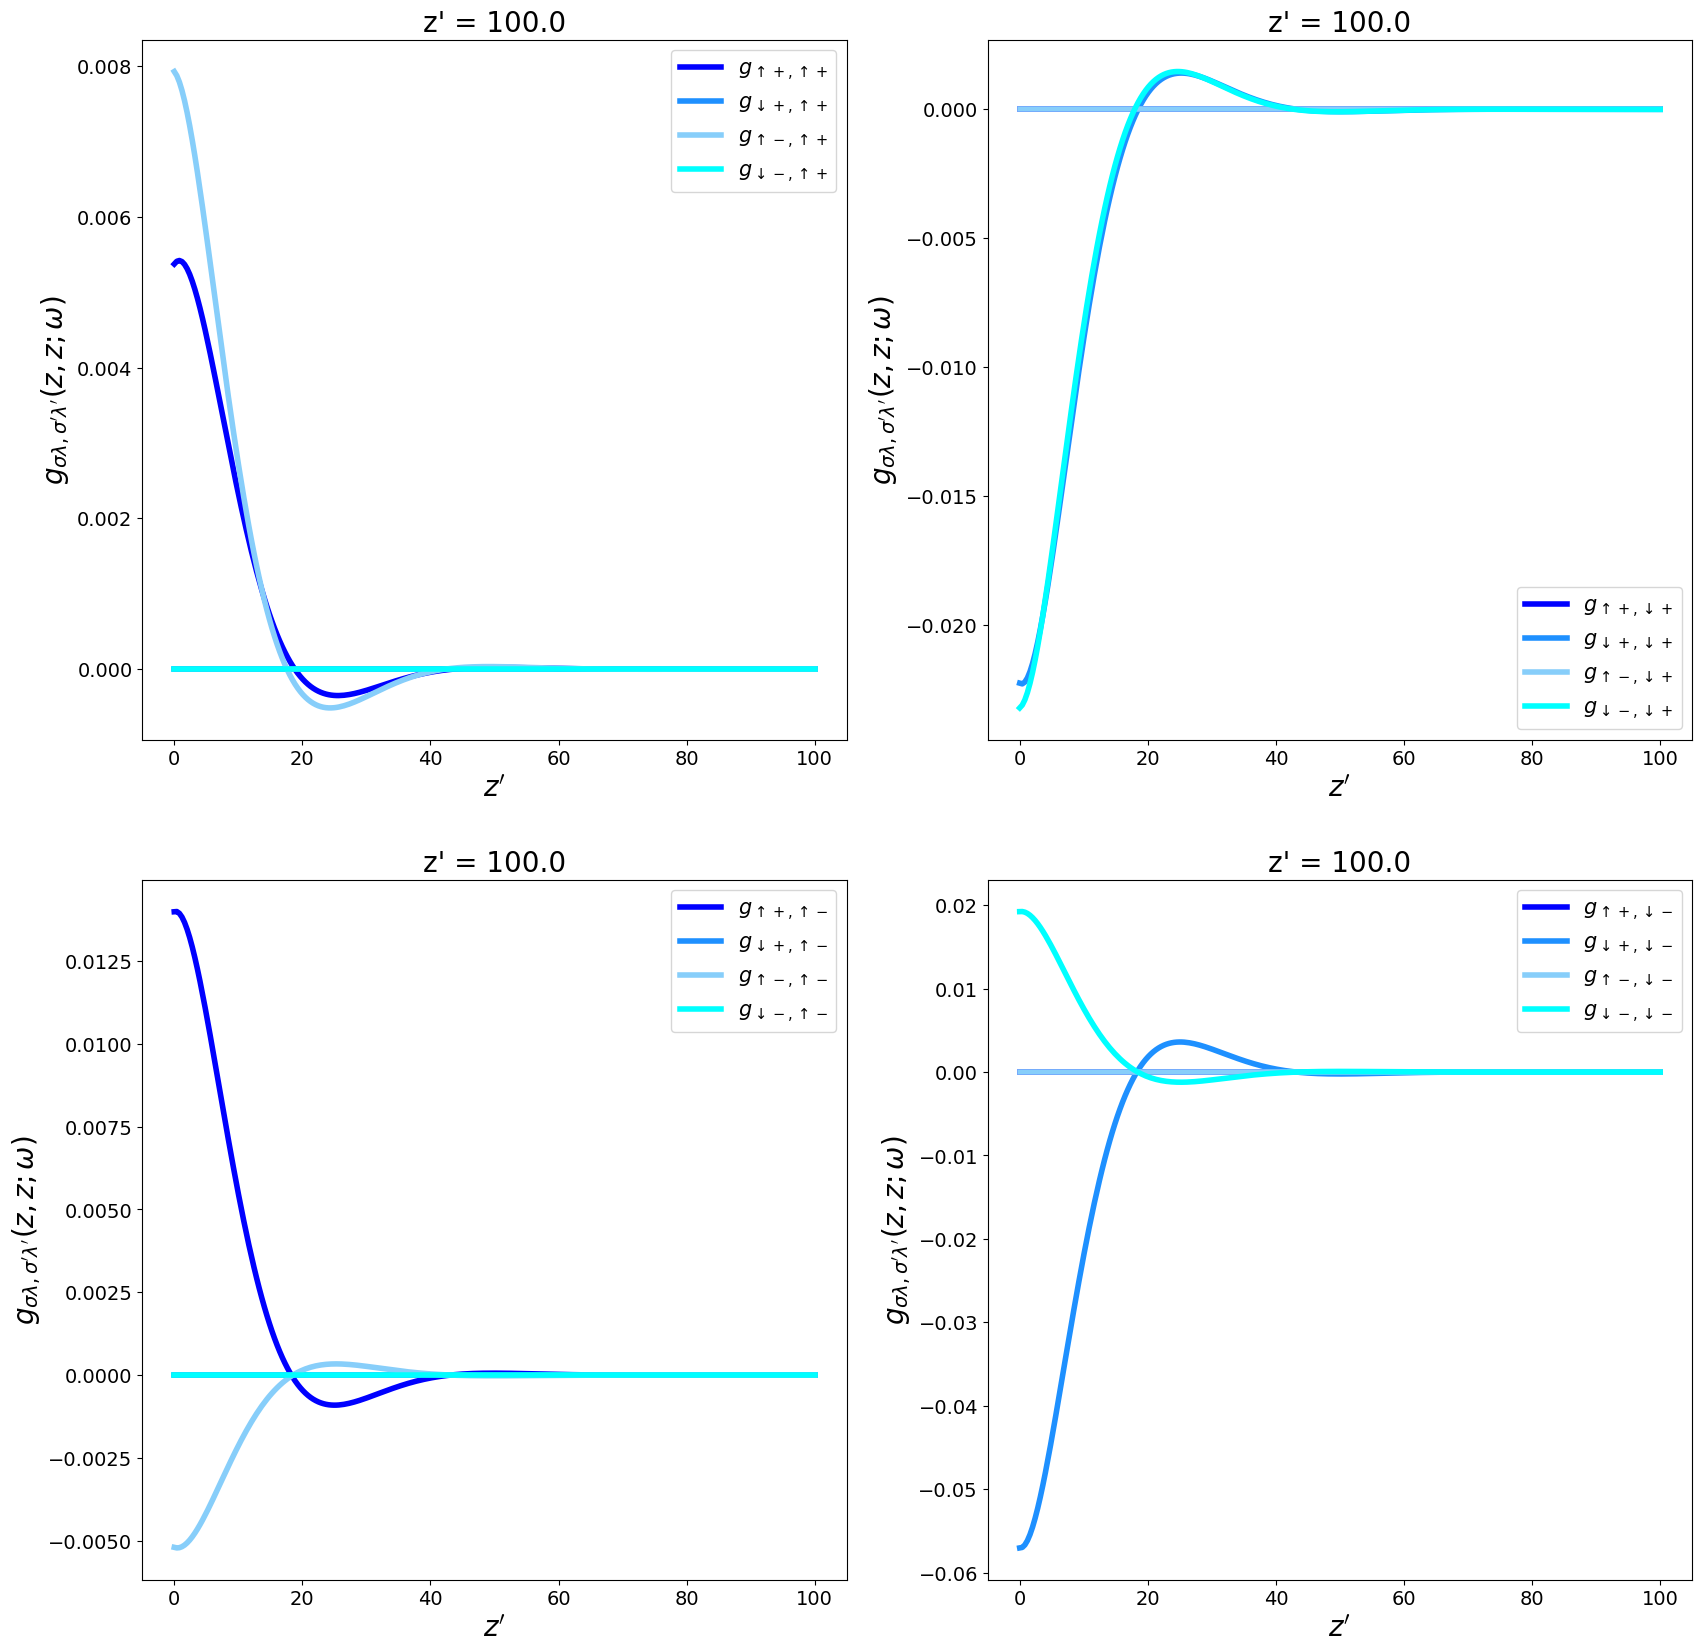

In [7]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction G2
        axs[iPic][jPic].plot(lattice, [gamma**2*G2[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_title("z' = " + str(zp), fontsize = 20)
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## **Anomalous Green's Function**
We plot here the Green's function $\mathcal{F}^{\dagger \, (0)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'=z$.

In [8]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute second order correction (Neumann BC)
F2_pairing = np.array([GMTI2_NeumannBC(d=d, z=z, Z=z, z0=z0, kx=0., ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])

#### <font color='green'> **Real Part** </font> 

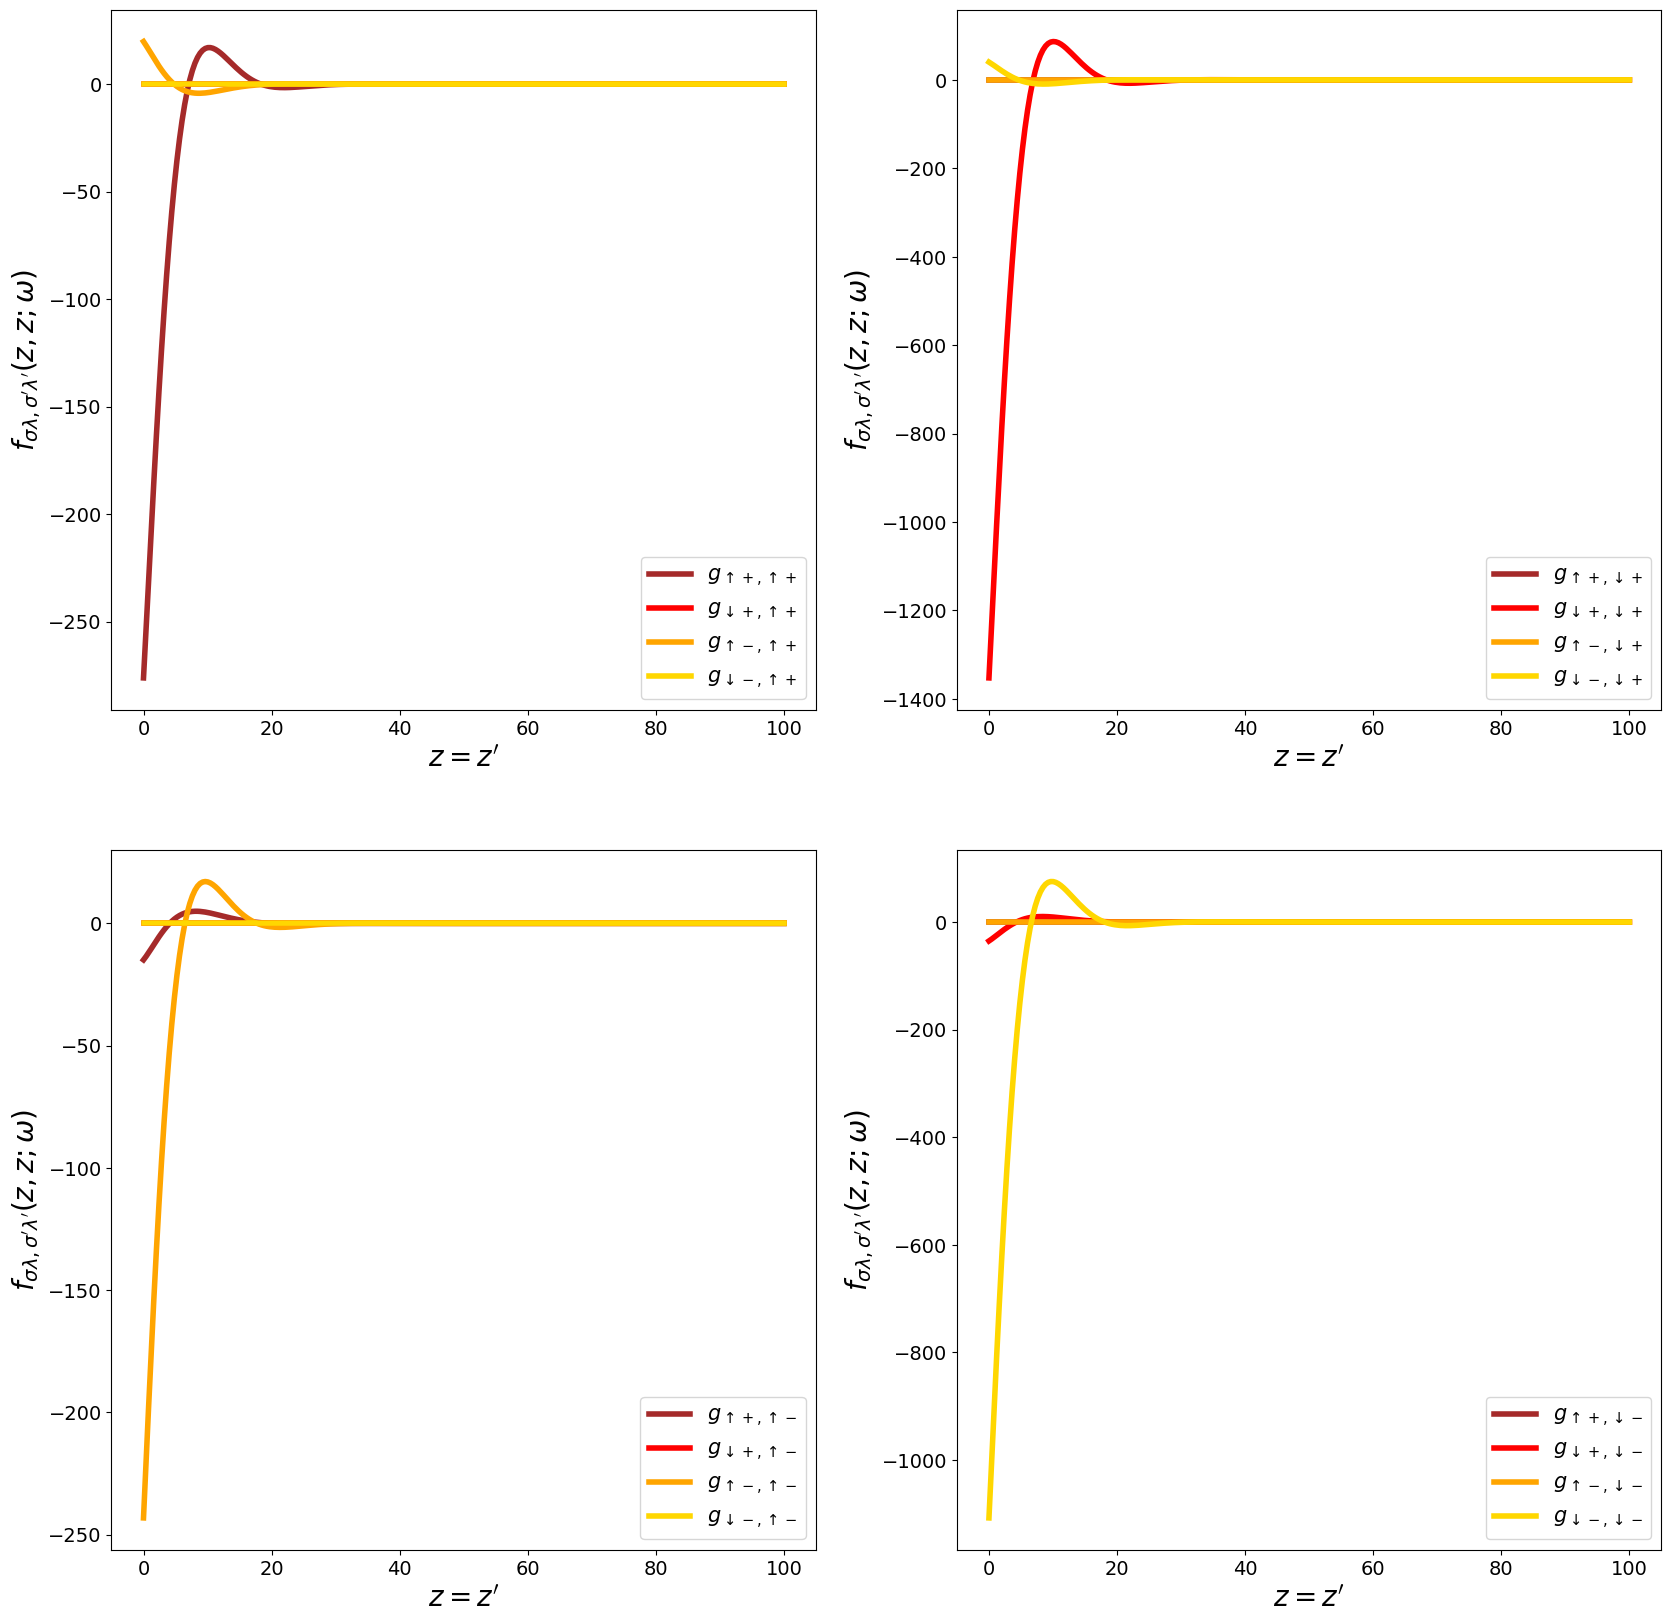

In [9]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [F2_pairing[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

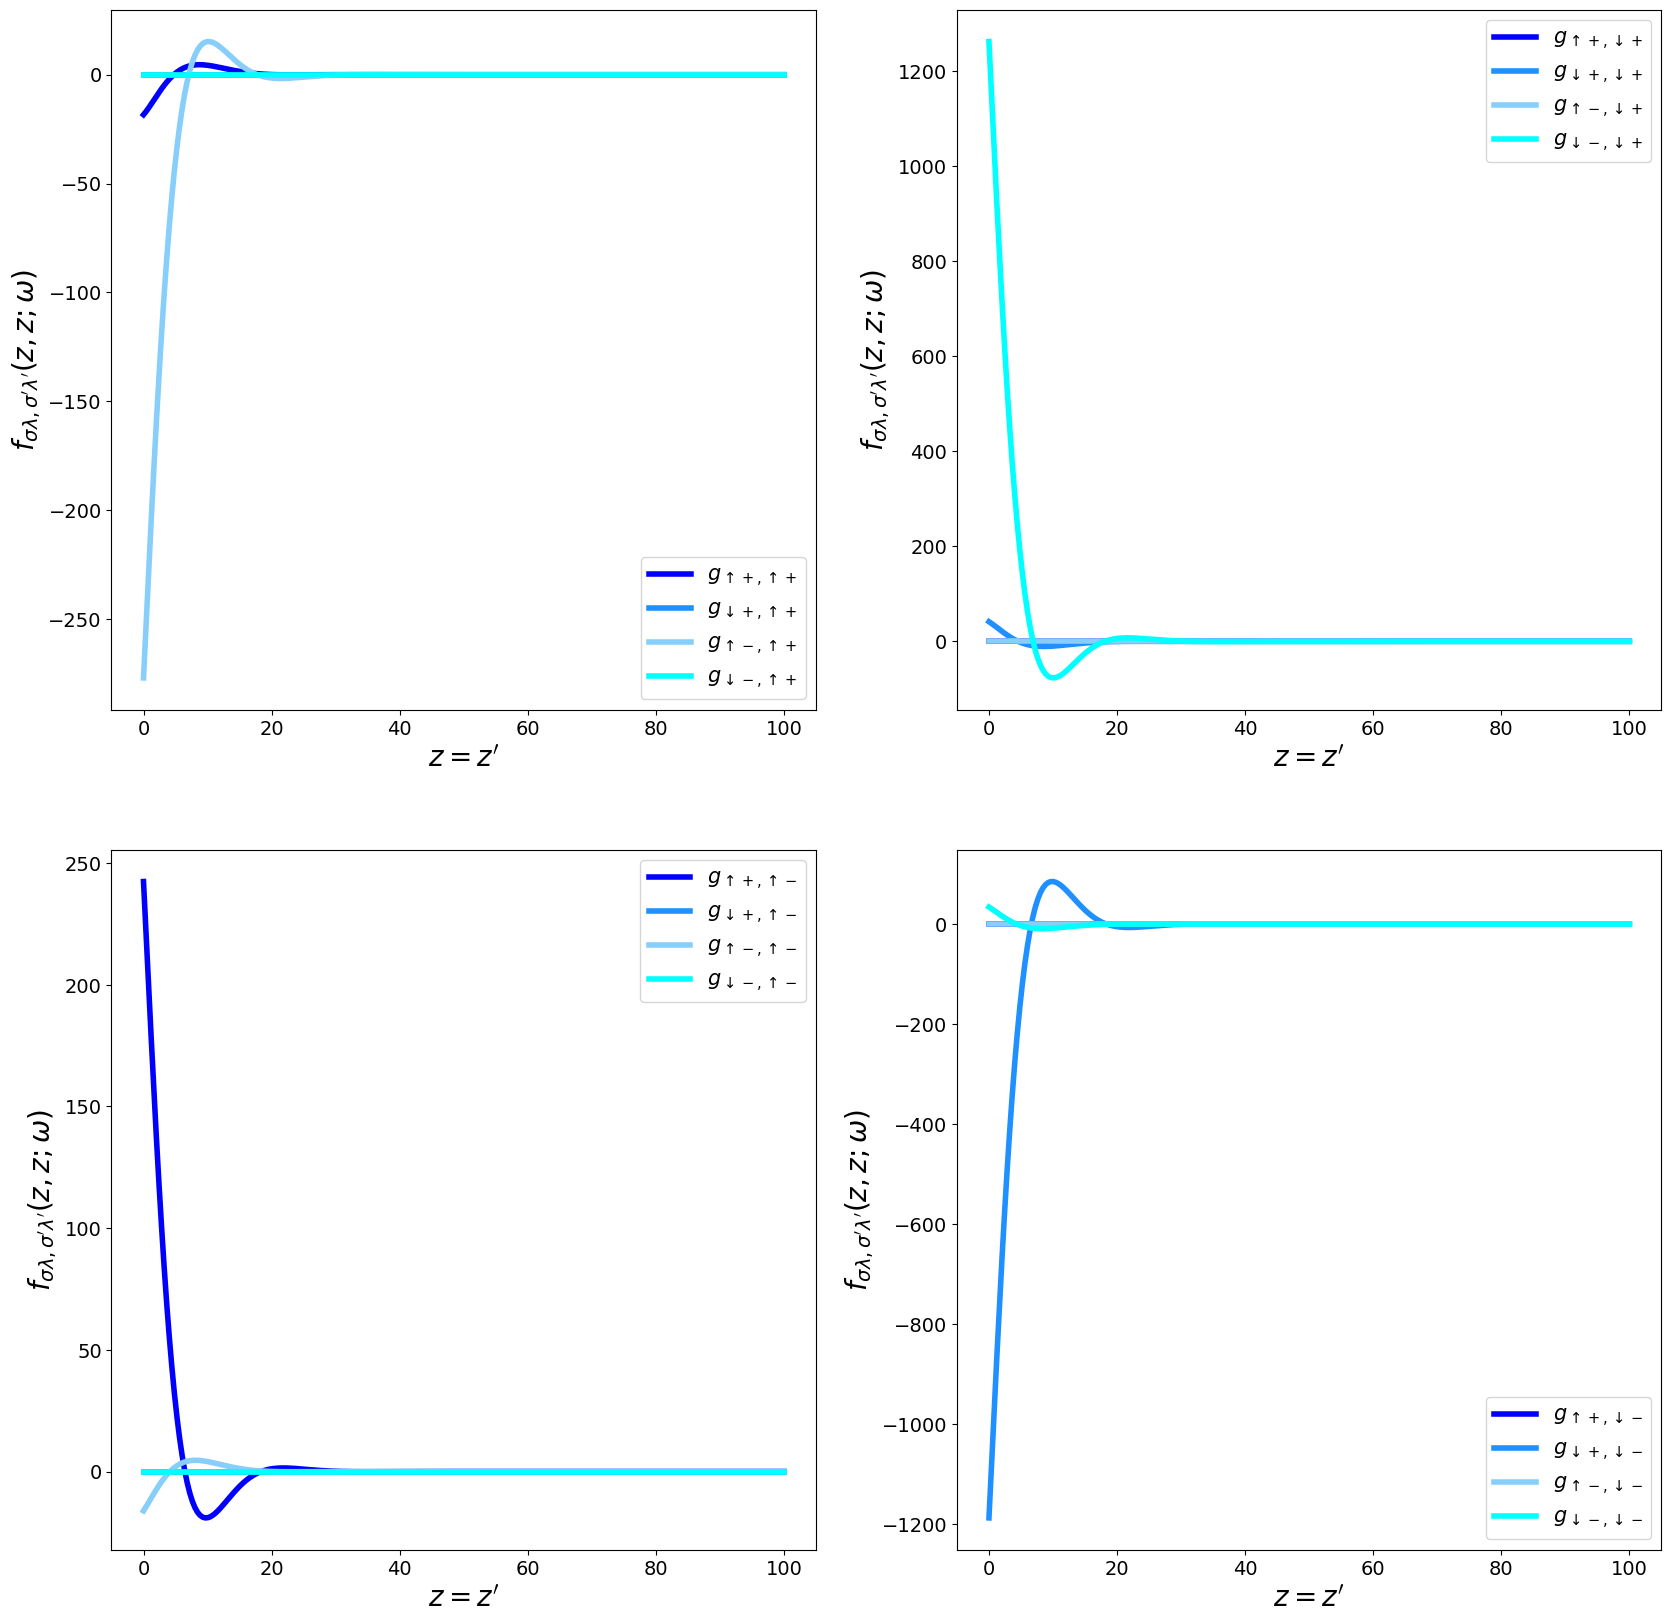

In [10]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [F2_pairing[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Induced Pairing** </font> 

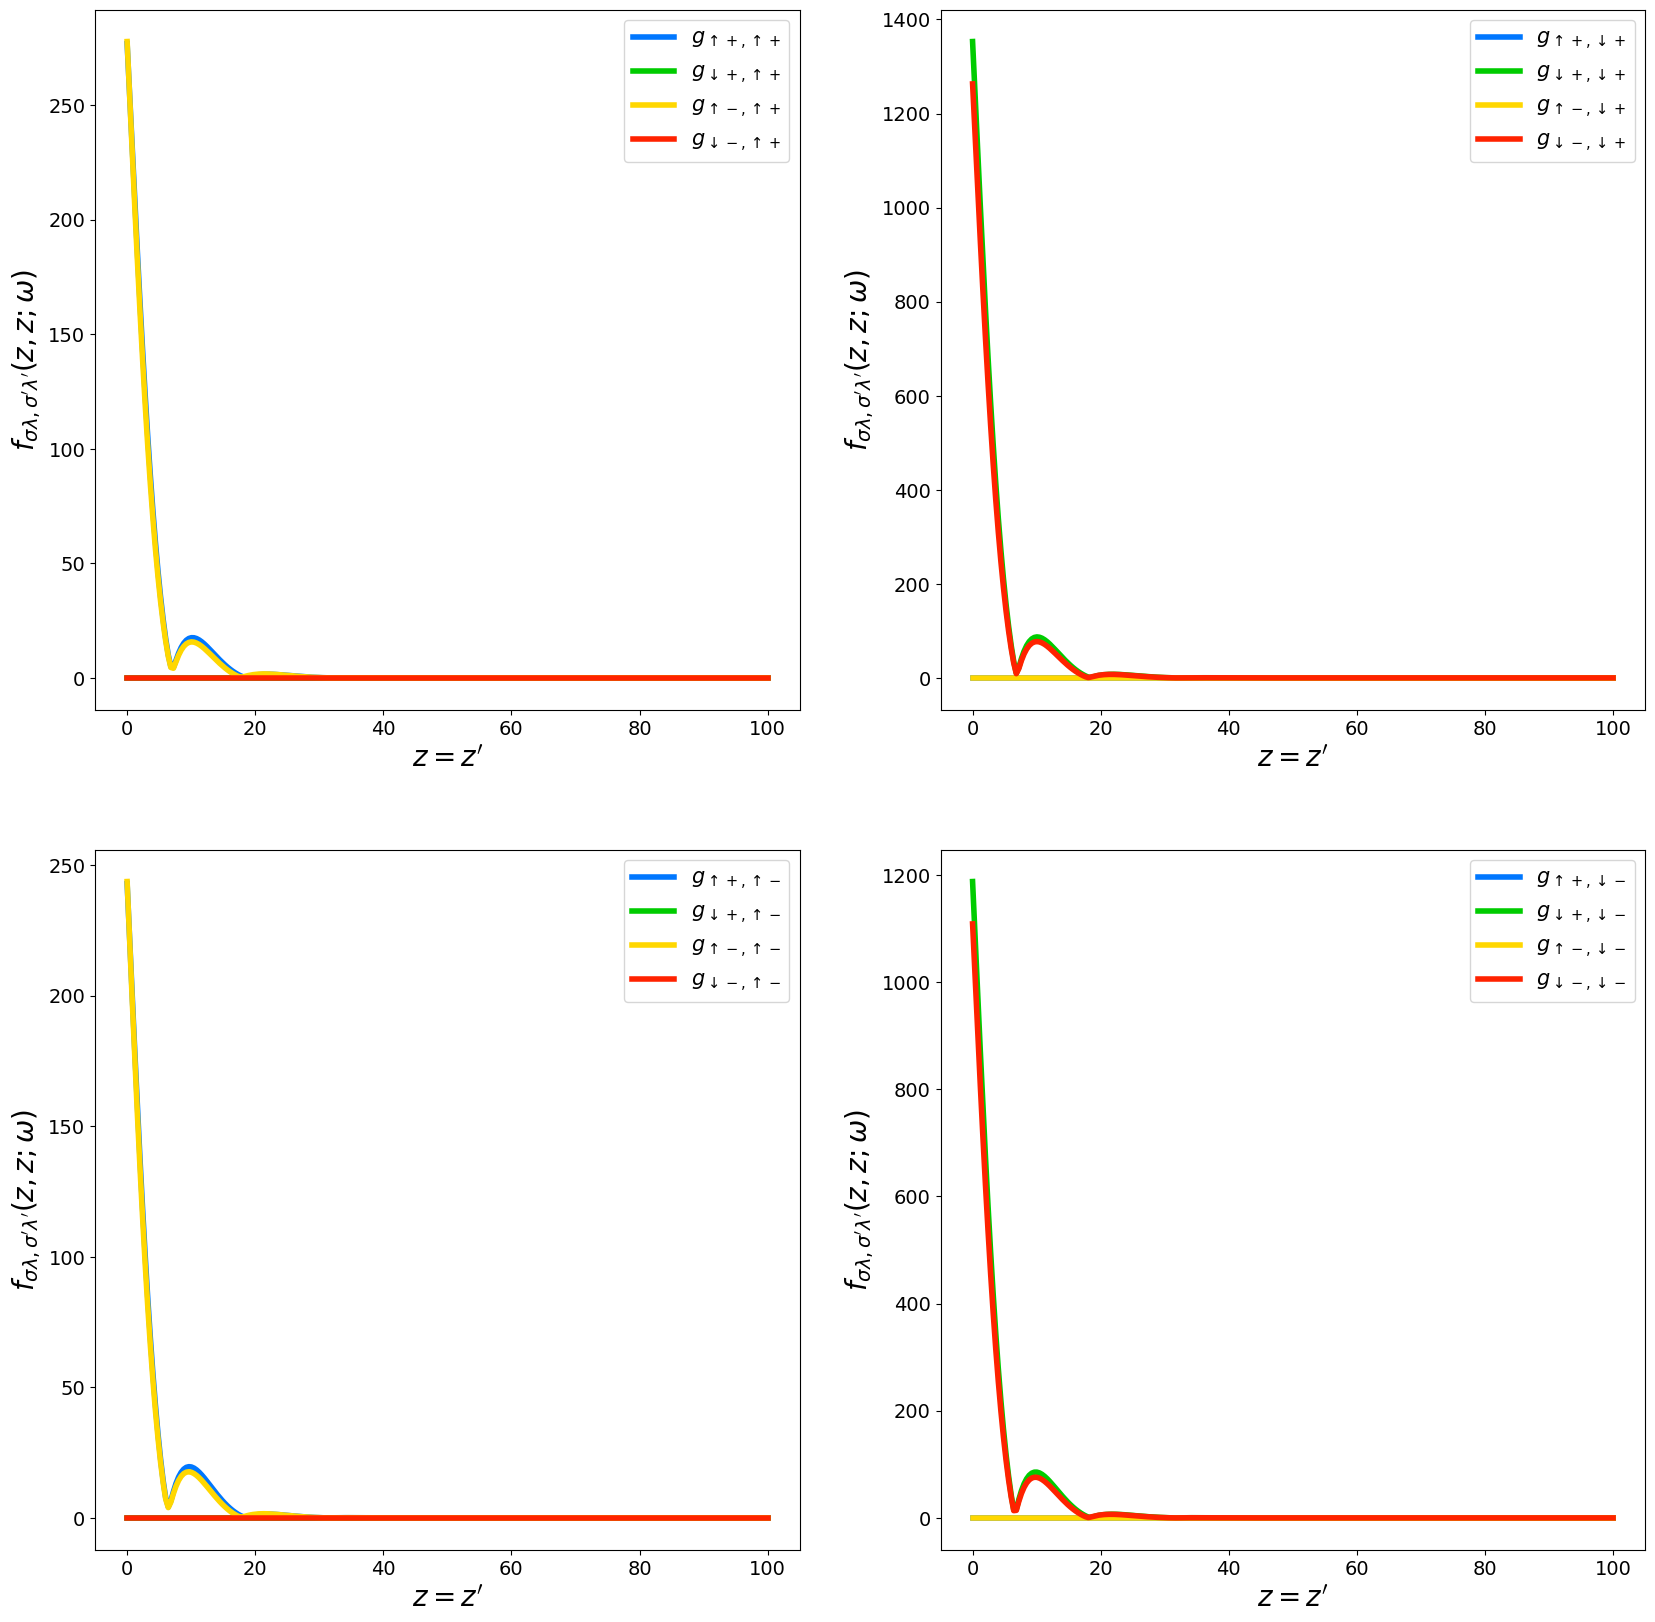

In [11]:
# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200",]
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [abs(F2_pairing[idx][irow][icol]) for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

We plot here the Green's function $\mathcal{F}^{\dagger \, (0)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'$ fixed.

In [12]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025; z0=0; zp = 100.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute second order correction (Neumann BC)
F2_correlations = np.array([GMTI2_NeumannBC(d=d, z=z, Z=zp, z0=z0, kx=0., ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])

#### <font color='green'> **Real Part** </font> 

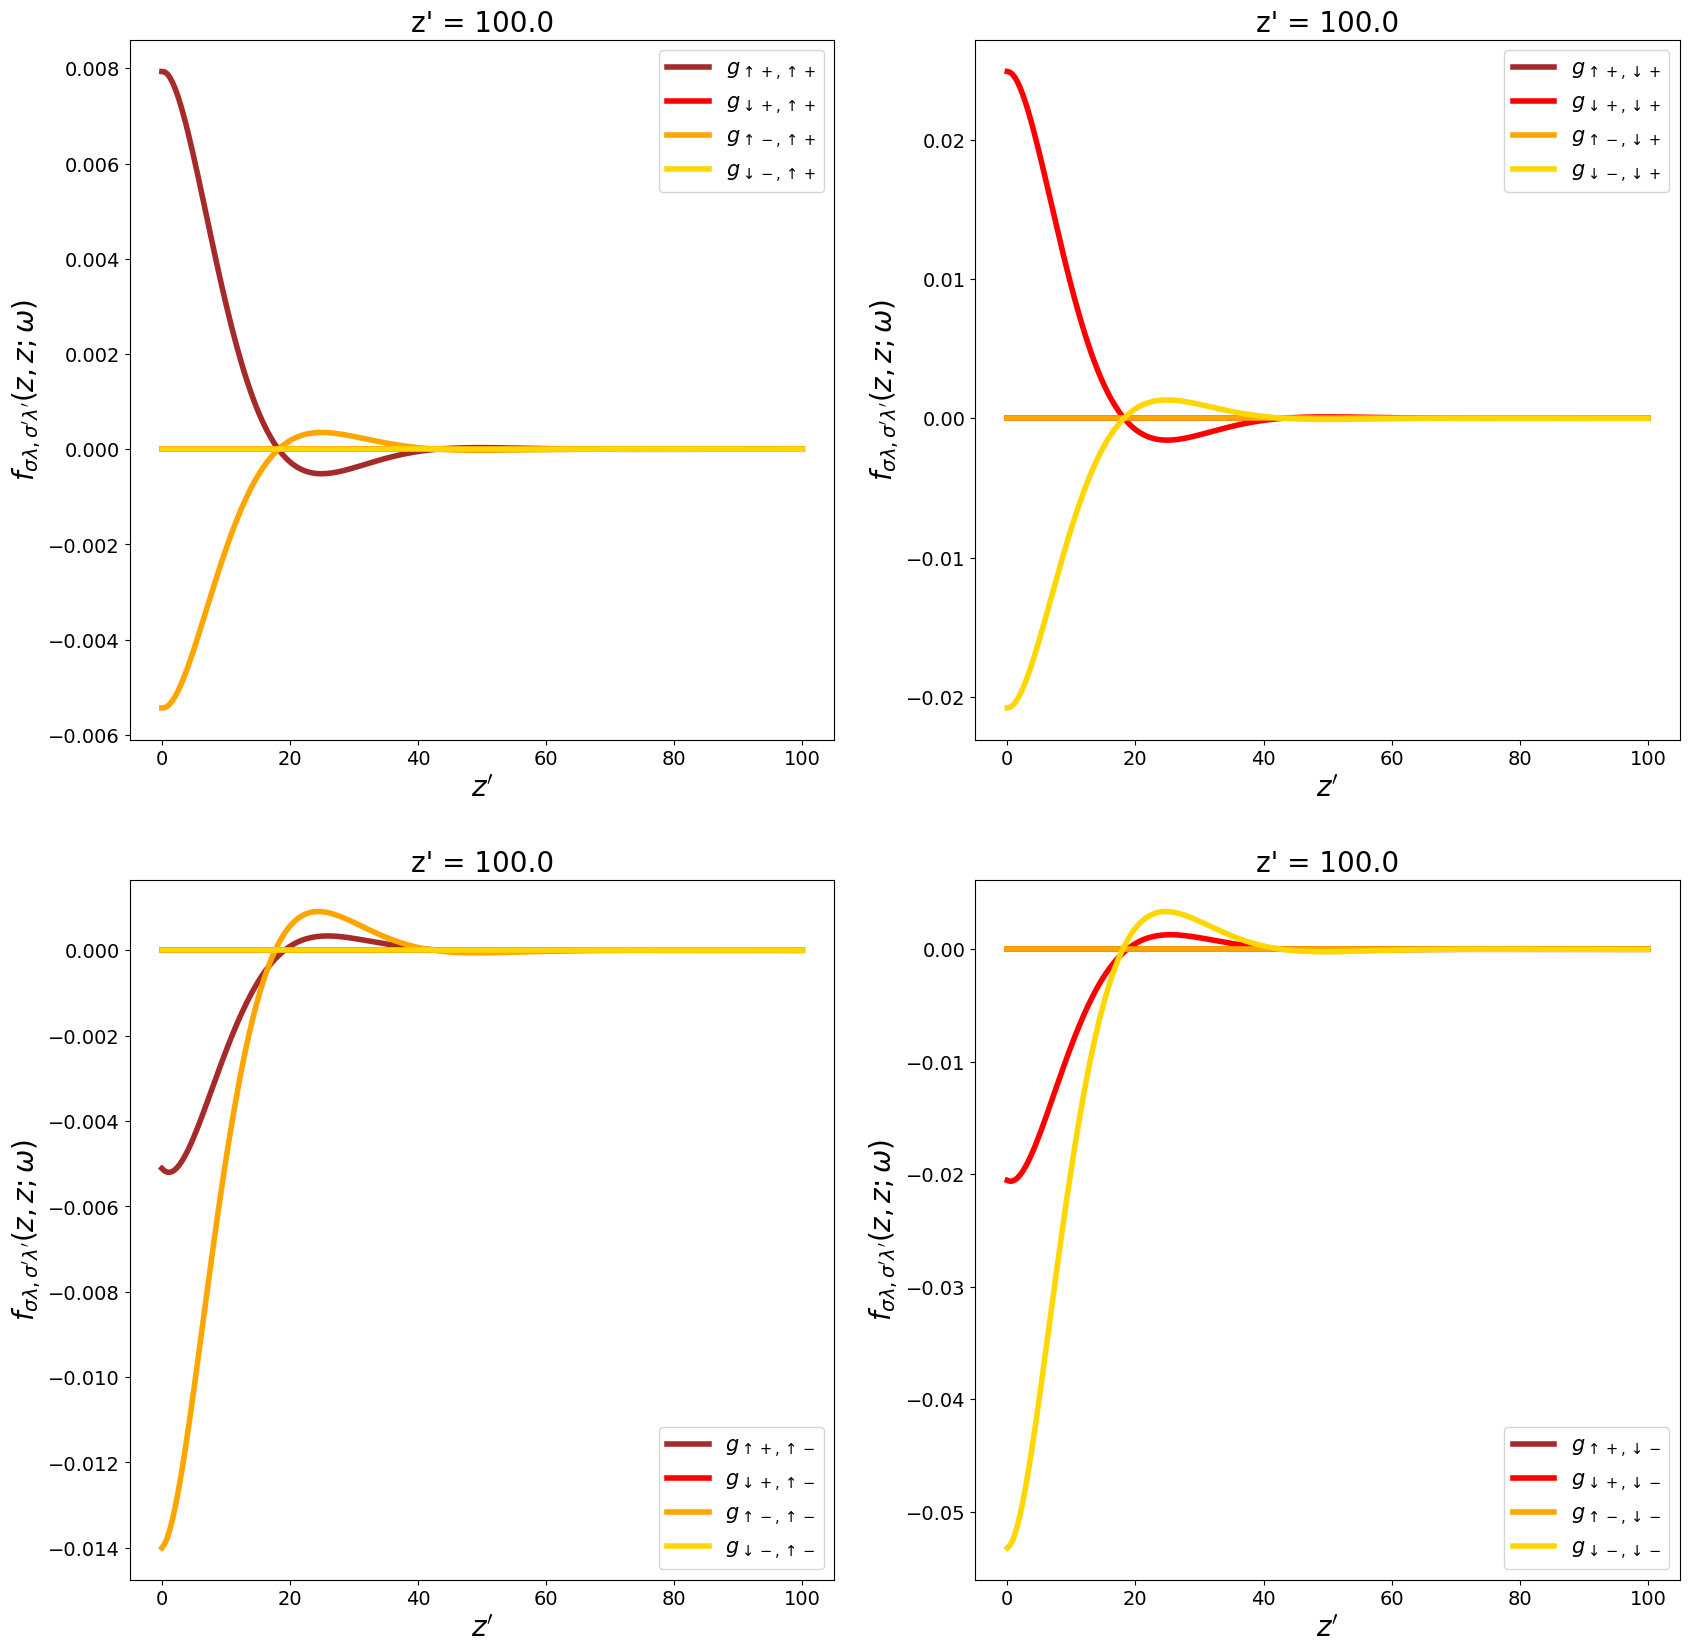

In [13]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [F2_correlations[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_title("z' = " + str(zp), fontsize = 20)    
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

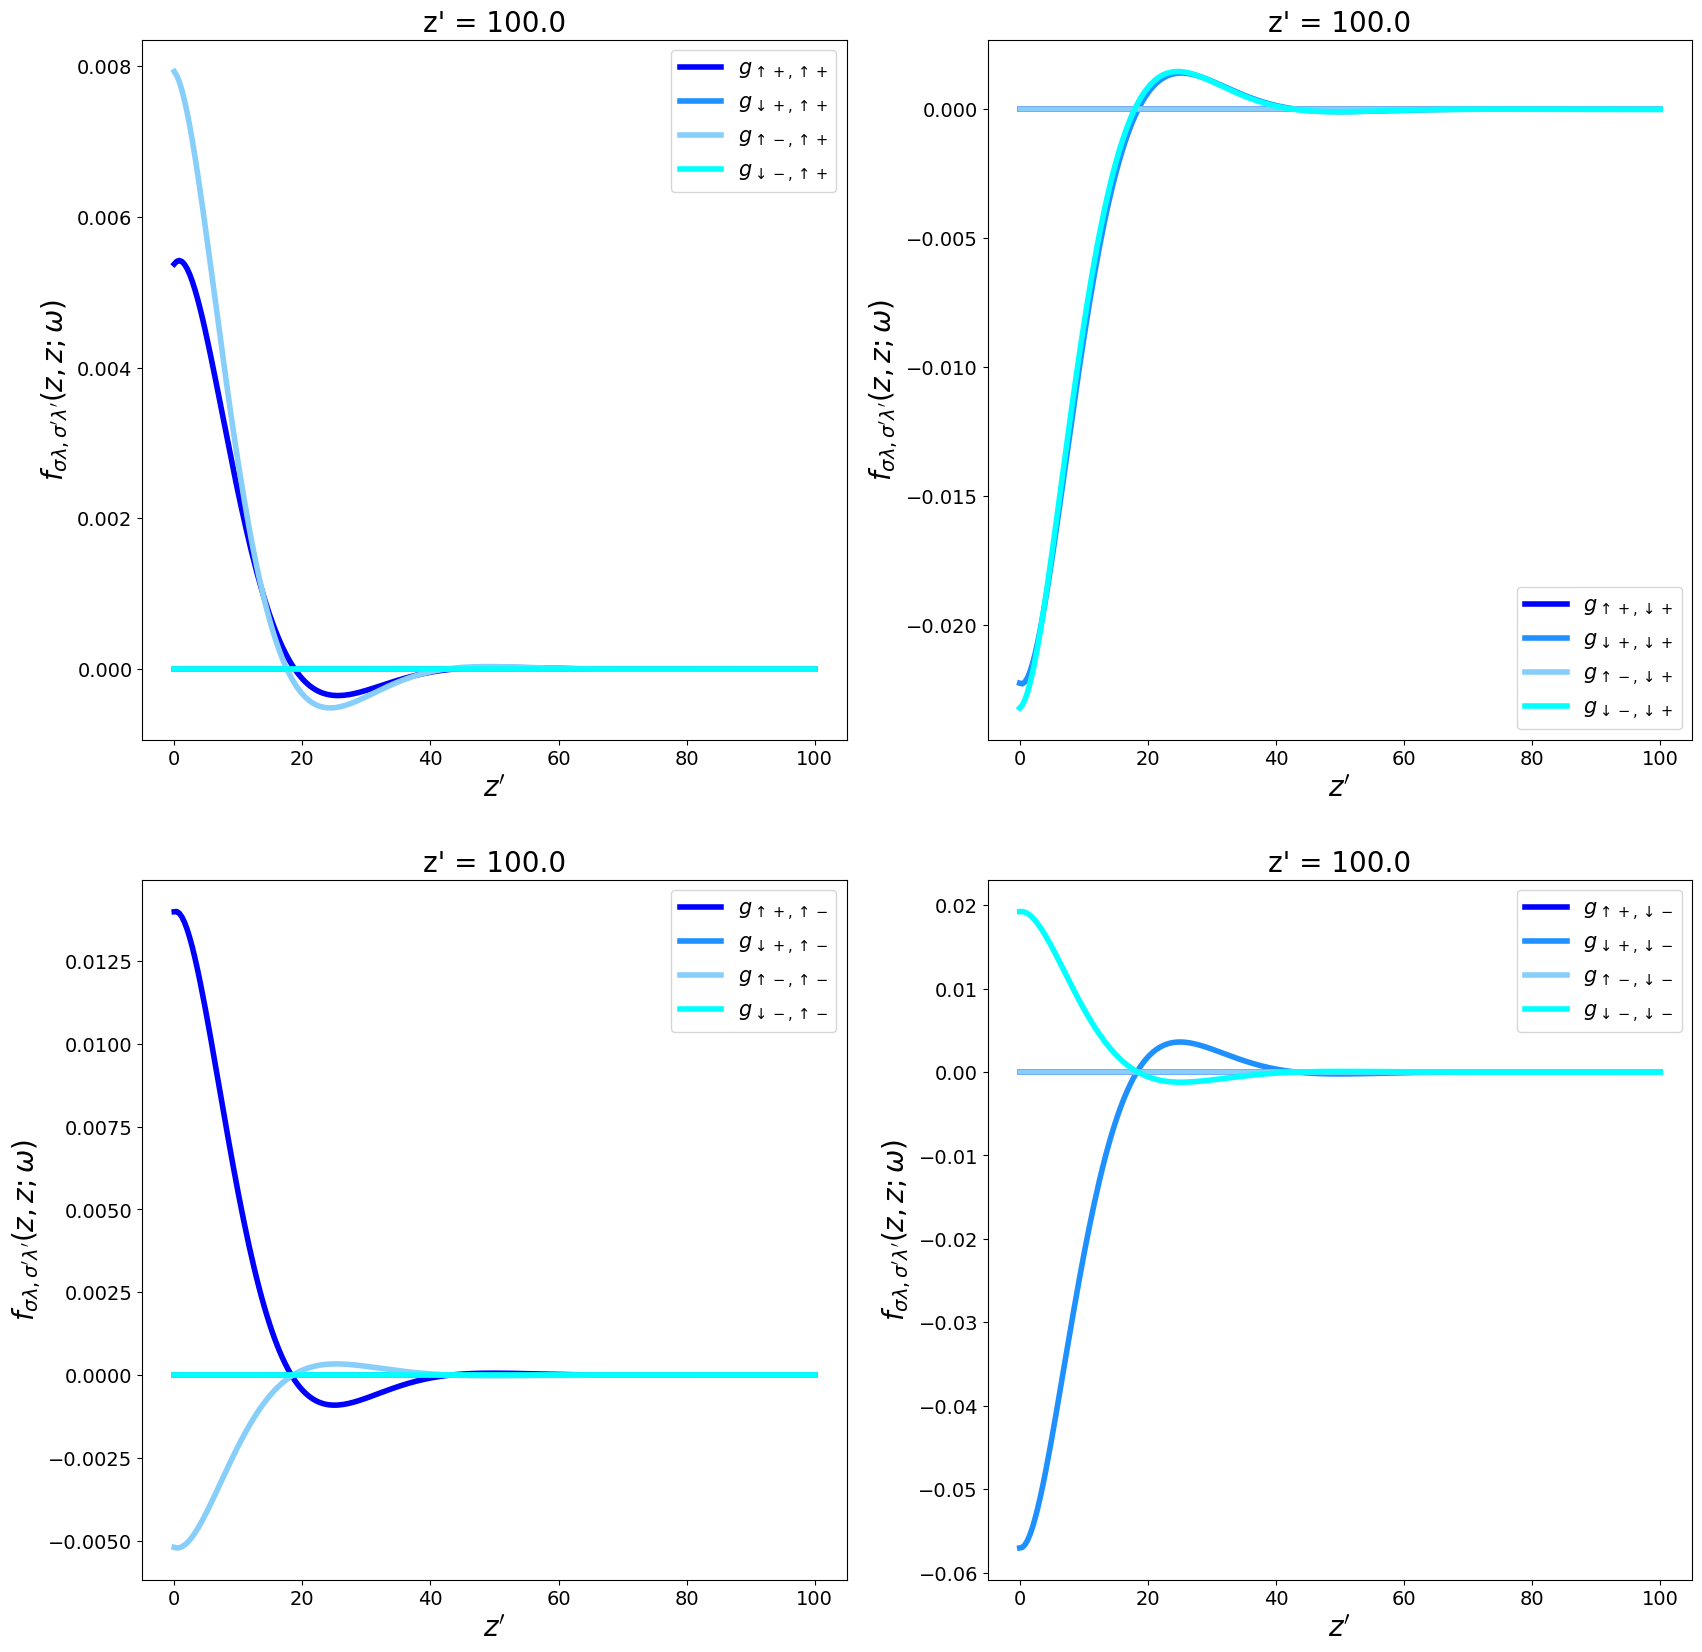

In [14]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [F2_correlations[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_title("z' = " + str(zp), fontsize = 20)    
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Two-points Correlations** </font> 

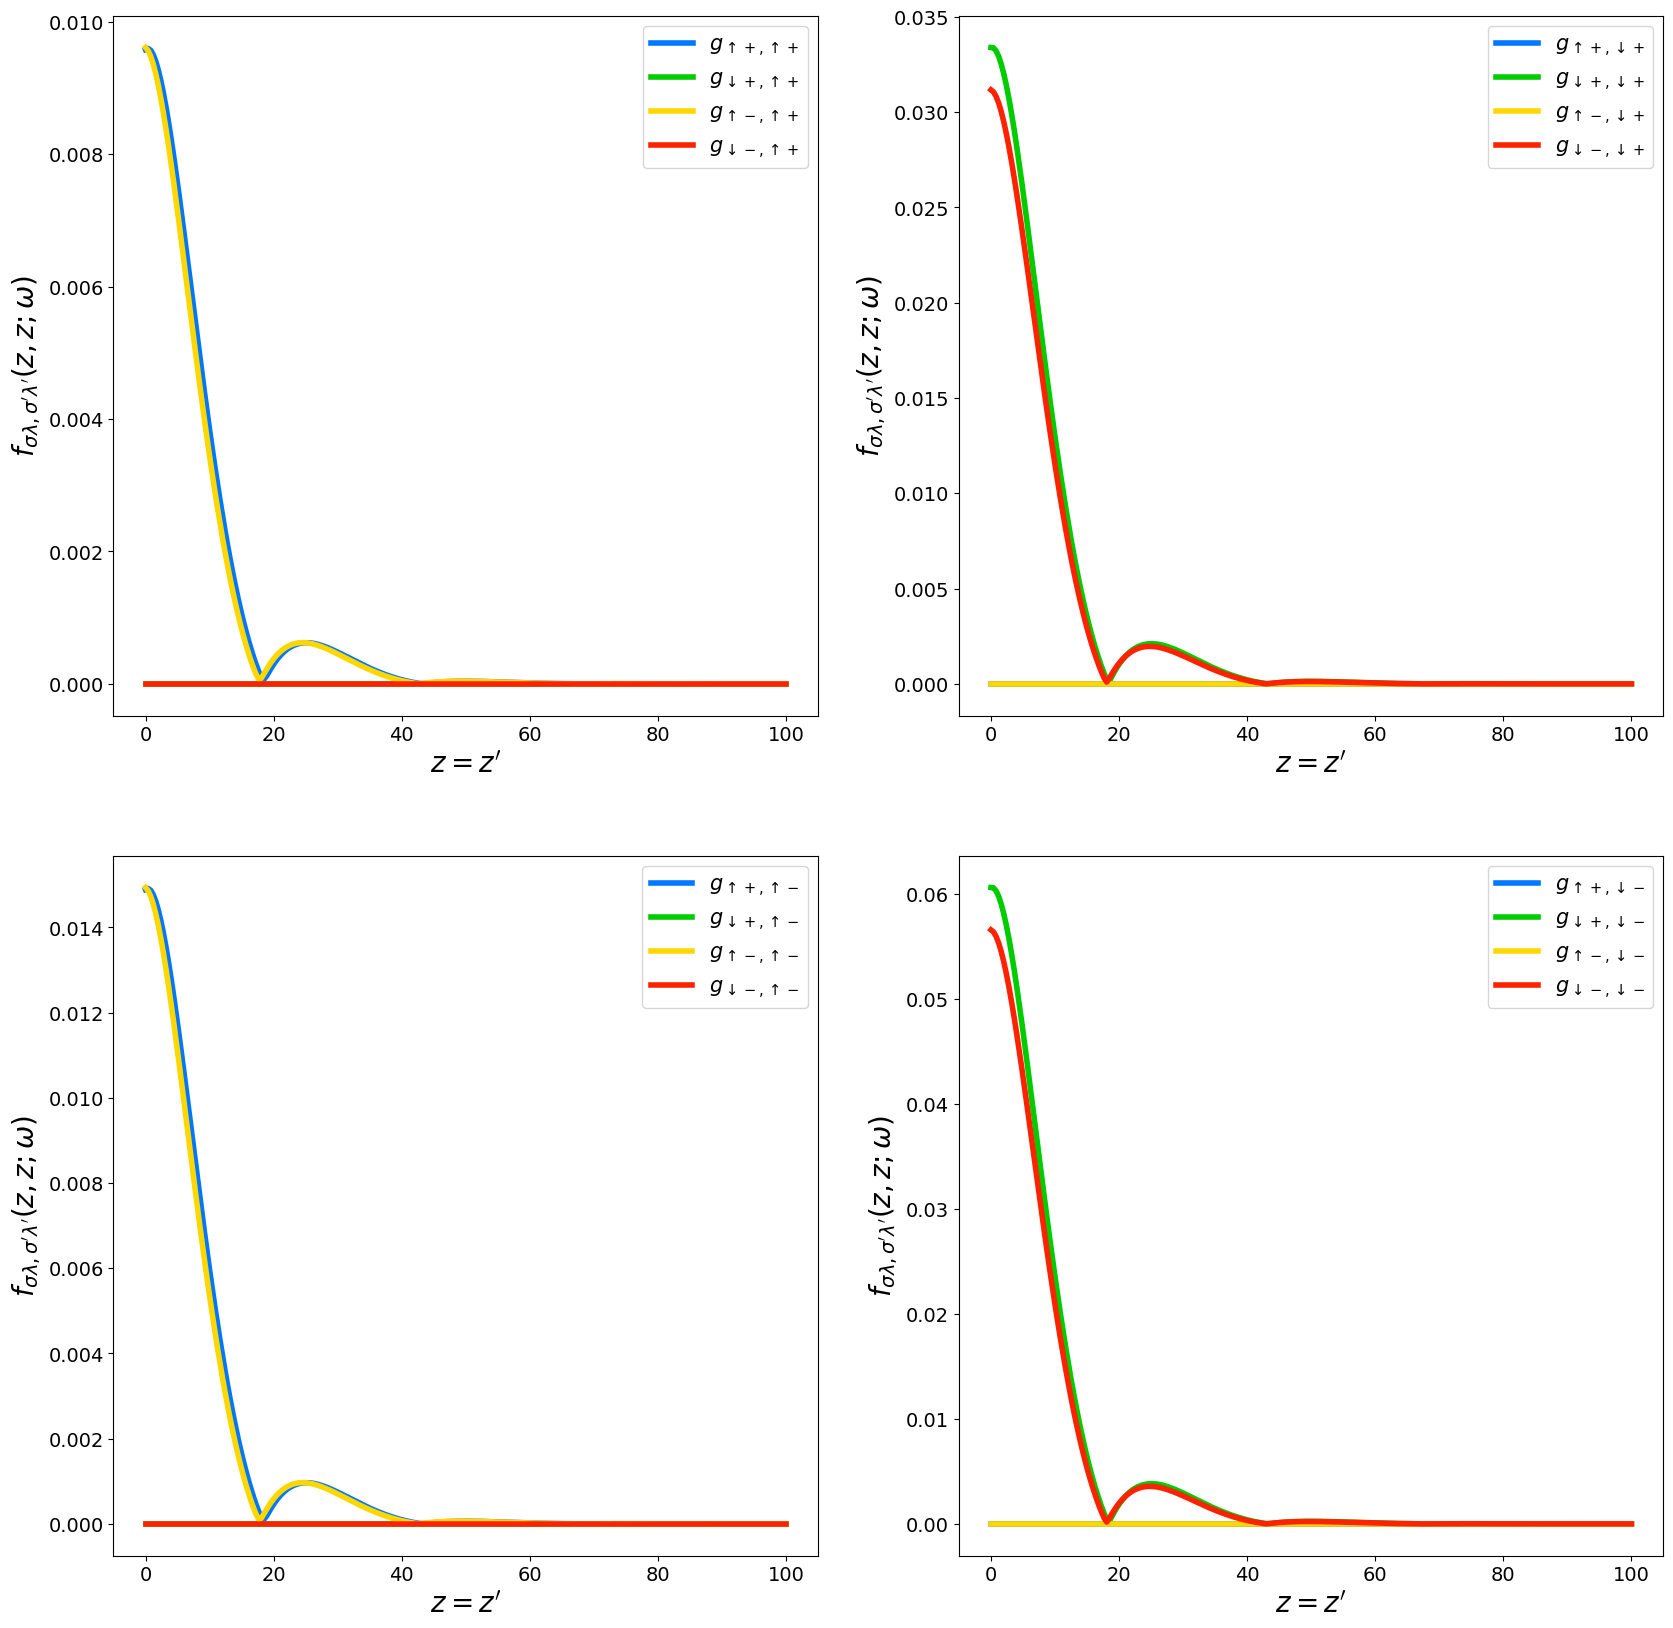

In [15]:
# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200",]
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, [abs(F2_correlations[idx][irow][icol]) for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);